<a href="https://colab.research.google.com/github/alexandrexsant/exer1/blob/main/arvore_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

# Instala a biblioteca odfpy se ainda não estiver instalada
!pip install odfpy

# Carregue o arquivo ODS
df = pd.read_excel("/content/drive/MyDrive/datasets/dadosfrutas.ods", engine="odf")
df


,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


In [10]:
## Como aplicar o método do slide para descobrir a fruta?

# Cria filtros para selecionar frutas com base em suas características
filtro_redonda = df["Arredondada"] == 1
filtro_suculenta = df["Suculenta"] == 1
filtro_vermelha = df["Vermelha"] == 1
filtro_doce = df["Doce"] == 1

# Aplica os filtros para encontrar frutas que são redondas, suculentas, vermelhas e doces
df[filtro_redonda & filtro_suculenta & filtro_vermelha & filtro_doce]


,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


In [11]:
## Como podemos fazer a máquina aprender?

from sklearn import tree

# Define as características (features) e o alvo (target) para o modelo
features = ["Arredondada","Suculenta","Vermelha","Doce"]
target = "Fruta"

# Separa os dados em variáveis de entrada (X) e saída (y)
X = df[features]
y = df[target]

In [12]:
# Cria e treina um classificador de árvore de decisão
arvore = tree.DecisionTreeClassifier(random_state=42)
arvore.fit(X, y)


DecisionTreeClassifier(random_state=42)

[Text(0.4090909090909091, 0.875, 'Arredondada <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.18181818181818182, 0.625, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0]\nclass = Banana'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.6363636363636364, 0.625, 'Vermelha <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.45454545454545453, 0.375, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 1, 0]\nclass = Limão'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]\nclass = Pera'),
 Text(0.8181818181818182, 0.375, 'Doce <= 0.5\ngini = 0.667\

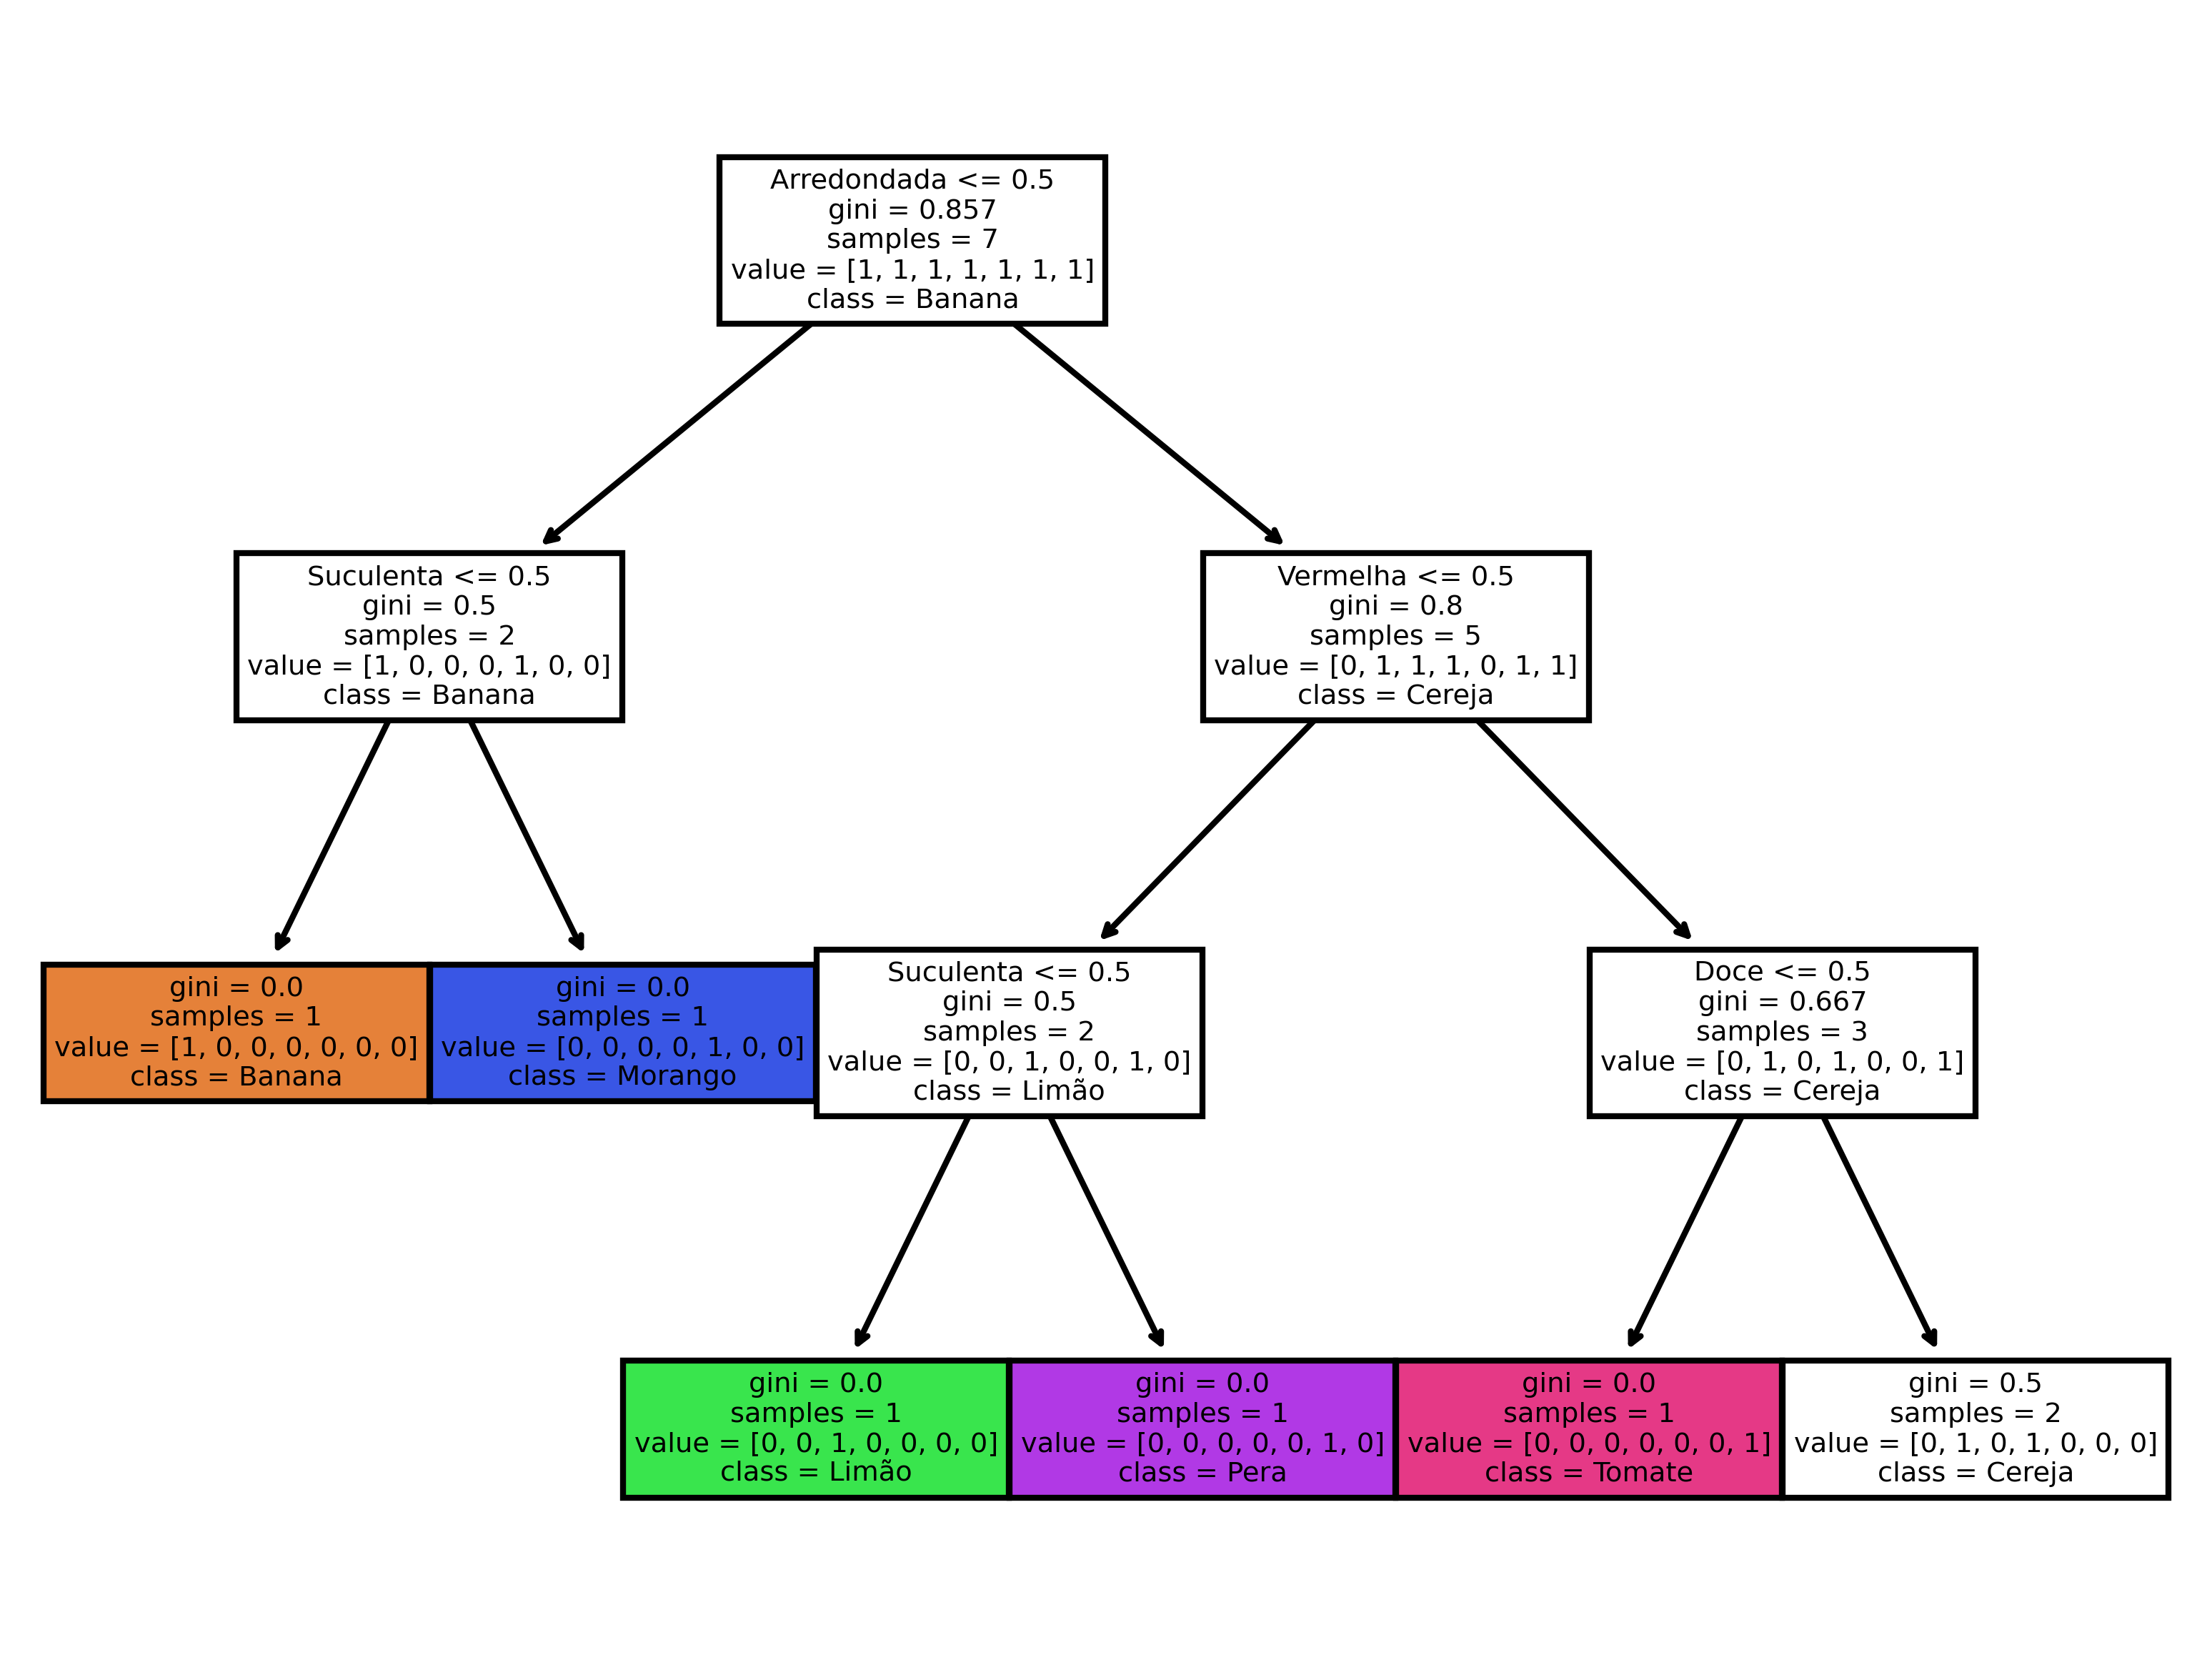

In [13]:
import matplotlib.pyplot as plt

# Configura a figura para alta resolução
plt.figure(dpi=600)

# Plota a árvore de decisão treinada
tree.plot_tree(arvore,
               class_names=arvore.classes_,
               feature_names=features,
               filled=True)


In [17]:
# Faz uma previsão com base em novas características
# ["Arredondada","Suculenta","Vermelha","Doce"]
arvore.predict([[0,1,1,1]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [18]:
# Obtém as probabilidades de cada classe para uma nova entrada
probas = arvore.predict_proba([[1,1,1,1]])[0]
pd.Series(probas, index=arvore.classes_)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,0
Banana,0.0
Cereja,0.5
Limão,0.0
Maçã,0.5
Morango,0.0
Pera,0.0
Tomate,0.0
